In [1]:
from keras.layers import Input, Dense
from keras.models import Model

input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)  # encoding_dim = 32
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# get the encoder and decoder as seperate models
# encoder
encoder = Model(input_img, encoded)

# decoder
encoded_input = Input(shape=(32,))  # encoding_dim = 32
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [2]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [9]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [3]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                validation_data=(x_test, x_test),
                verbose=1)

Epoch 1/50
235/235 [==============================] - 4s 5ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6935 - val_loss: 0.6933
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6932 - val_loss: 0.6930
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6929 - val_loss: 0.6927
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6926 - val_loss: 0.6924
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6924 - val_loss: 0.6923
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6923 - val_loss: 0.6921

In [4]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


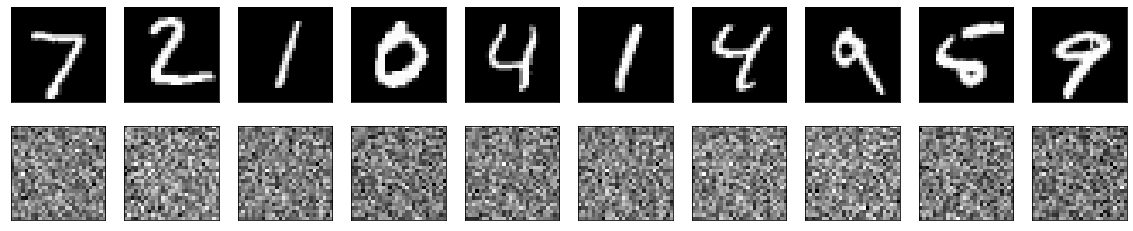

In [5]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()